In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_sub = pd.read_csv('sample_submission.csv')

# EDA
1. Dataset analysis
2. Numerical feature analysis
3. Categorical feature analysis
4. Missing value analysis and trends
5. Correlation analysis
6. Feature engineering
7. Model selection and training
8. Hyperparameter tuning

# Dataset Analysis

In [4]:
df.head(3)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [6]:
df.columns

Index(['id', 'Name', 'Gender', 'Age', 'City',
       'Working Professional or Student', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [7]:
df.shape

(140700, 20)

In [8]:
df.dtypes

id                                         int64
Name                                      object
Gender                                    object
Age                                      float64
City                                      object
Working Professional or Student           object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness          object
Depression                                 int64
dtype: object

In [9]:
num_cols = df.drop(columns=['id','Depression']).select_dtypes(include="number").columns
cat_cols = df.drop(columns=['id','Depression']).select_dtypes(exclude="number").columns

In [10]:
print("Numerical features:",len(num_cols))
print("Categorical features:",len(cat_cols))
print(num_cols)
print(cat_cols)

Numerical features: 8
Categorical features: 10
Index(['Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours',
       'Financial Stress'],
      dtype='object')
Index(['Name', 'Gender', 'City', 'Working Professional or Student',
       'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?',
       'Family History of Mental Illness'],
      dtype='object')


In [11]:
df.duplicated().sum()

0

In [12]:
df.isnull().sum() 

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

# Observations
1. There are 140700 rows of data, with 18 feature columns (- id column) and 1 target column ("Depression")
2. There are 8 numerical features, 10 categorical features
3. There are missing values in multiple columns

# Numerical Feature analysis
1. Describe --> General min/max/mean data
2. Boxplot, Histplot of each numerical feature --> Understand distribution, outliers
3. Find the skew and kurtosis for each --> High Skew and high kurtosis may require log scaling during feature engineering 

In [13]:
df[num_cols].describe().style.background_gradient(cmap='viridis')

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress
count,140700.000000,27897.000000,112782.000000,27898.000000,27897.000000,112790.000000,140700.000000,140696.000000
mean,40.388621,3.142273,2.998998,7.658636,2.944940,2.974404,6.252679,2.988983
std,12.384099,1.380457,1.405771,1.464466,1.360197,1.416078,3.853615,1.413633
min,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000
25%,29.000000,2.000000,2.000000,6.290000,2.000000,2.000000,3.000000,2.000000
50%,42.000000,3.000000,3.000000,7.770000,3.000000,3.000000,6.000000,3.000000
75%,51.000000,4.000000,4.000000,8.920000,4.000000,4.000000,10.000000,4.000000
max,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000


In [14]:
df_test[num_cols].describe().style.background_gradient(cmap='viridis')

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress
count,93800.000000,18767.000000,75022.000000,18766.000000,18767.000000,75026.000000,93800.000000,93800.000000
mean,40.321685,3.158576,3.011797,7.674016,2.939522,2.960920,6.247335,2.978763
std,12.393480,1.386666,1.403563,1.465056,1.374242,1.410710,3.858191,1.414604
min,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000
25%,29.000000,2.000000,2.000000,6.330000,2.000000,2.000000,3.000000,2.000000
50%,42.000000,3.000000,3.000000,7.800000,3.000000,3.000000,6.000000,3.000000
75%,51.000000,4.000000,4.000000,8.940000,4.000000,4.000000,10.000000,4.000000
max,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000


**Test and Train data appears similar, we can reasonably conclude that insights from df can be applied to df_test also**

In [15]:
def numerical_analysis(df,cols):
    fig,axs = plt.subplots(len(cols),2,figsize=(20,3*len(cols)))
    for i,col in enumerate(num_cols):
        axs[i,0].set_title(f"{col} histplot")
        sns.histplot(data=df,x=col,ax=axs[i,0], bins=20, kde=True)
        axs[i,1].set_title(f"{col} boxplot")
        sns.boxplot(data=df,x=col,ax=axs[i,1])

    plt.tight_layout()
    plt.show()

    for col in cols:
        print(f"{col} Skewness: {df[col].skew()}")
        print(f"{col} Kurtosis: {df[col].kurtosis()}")


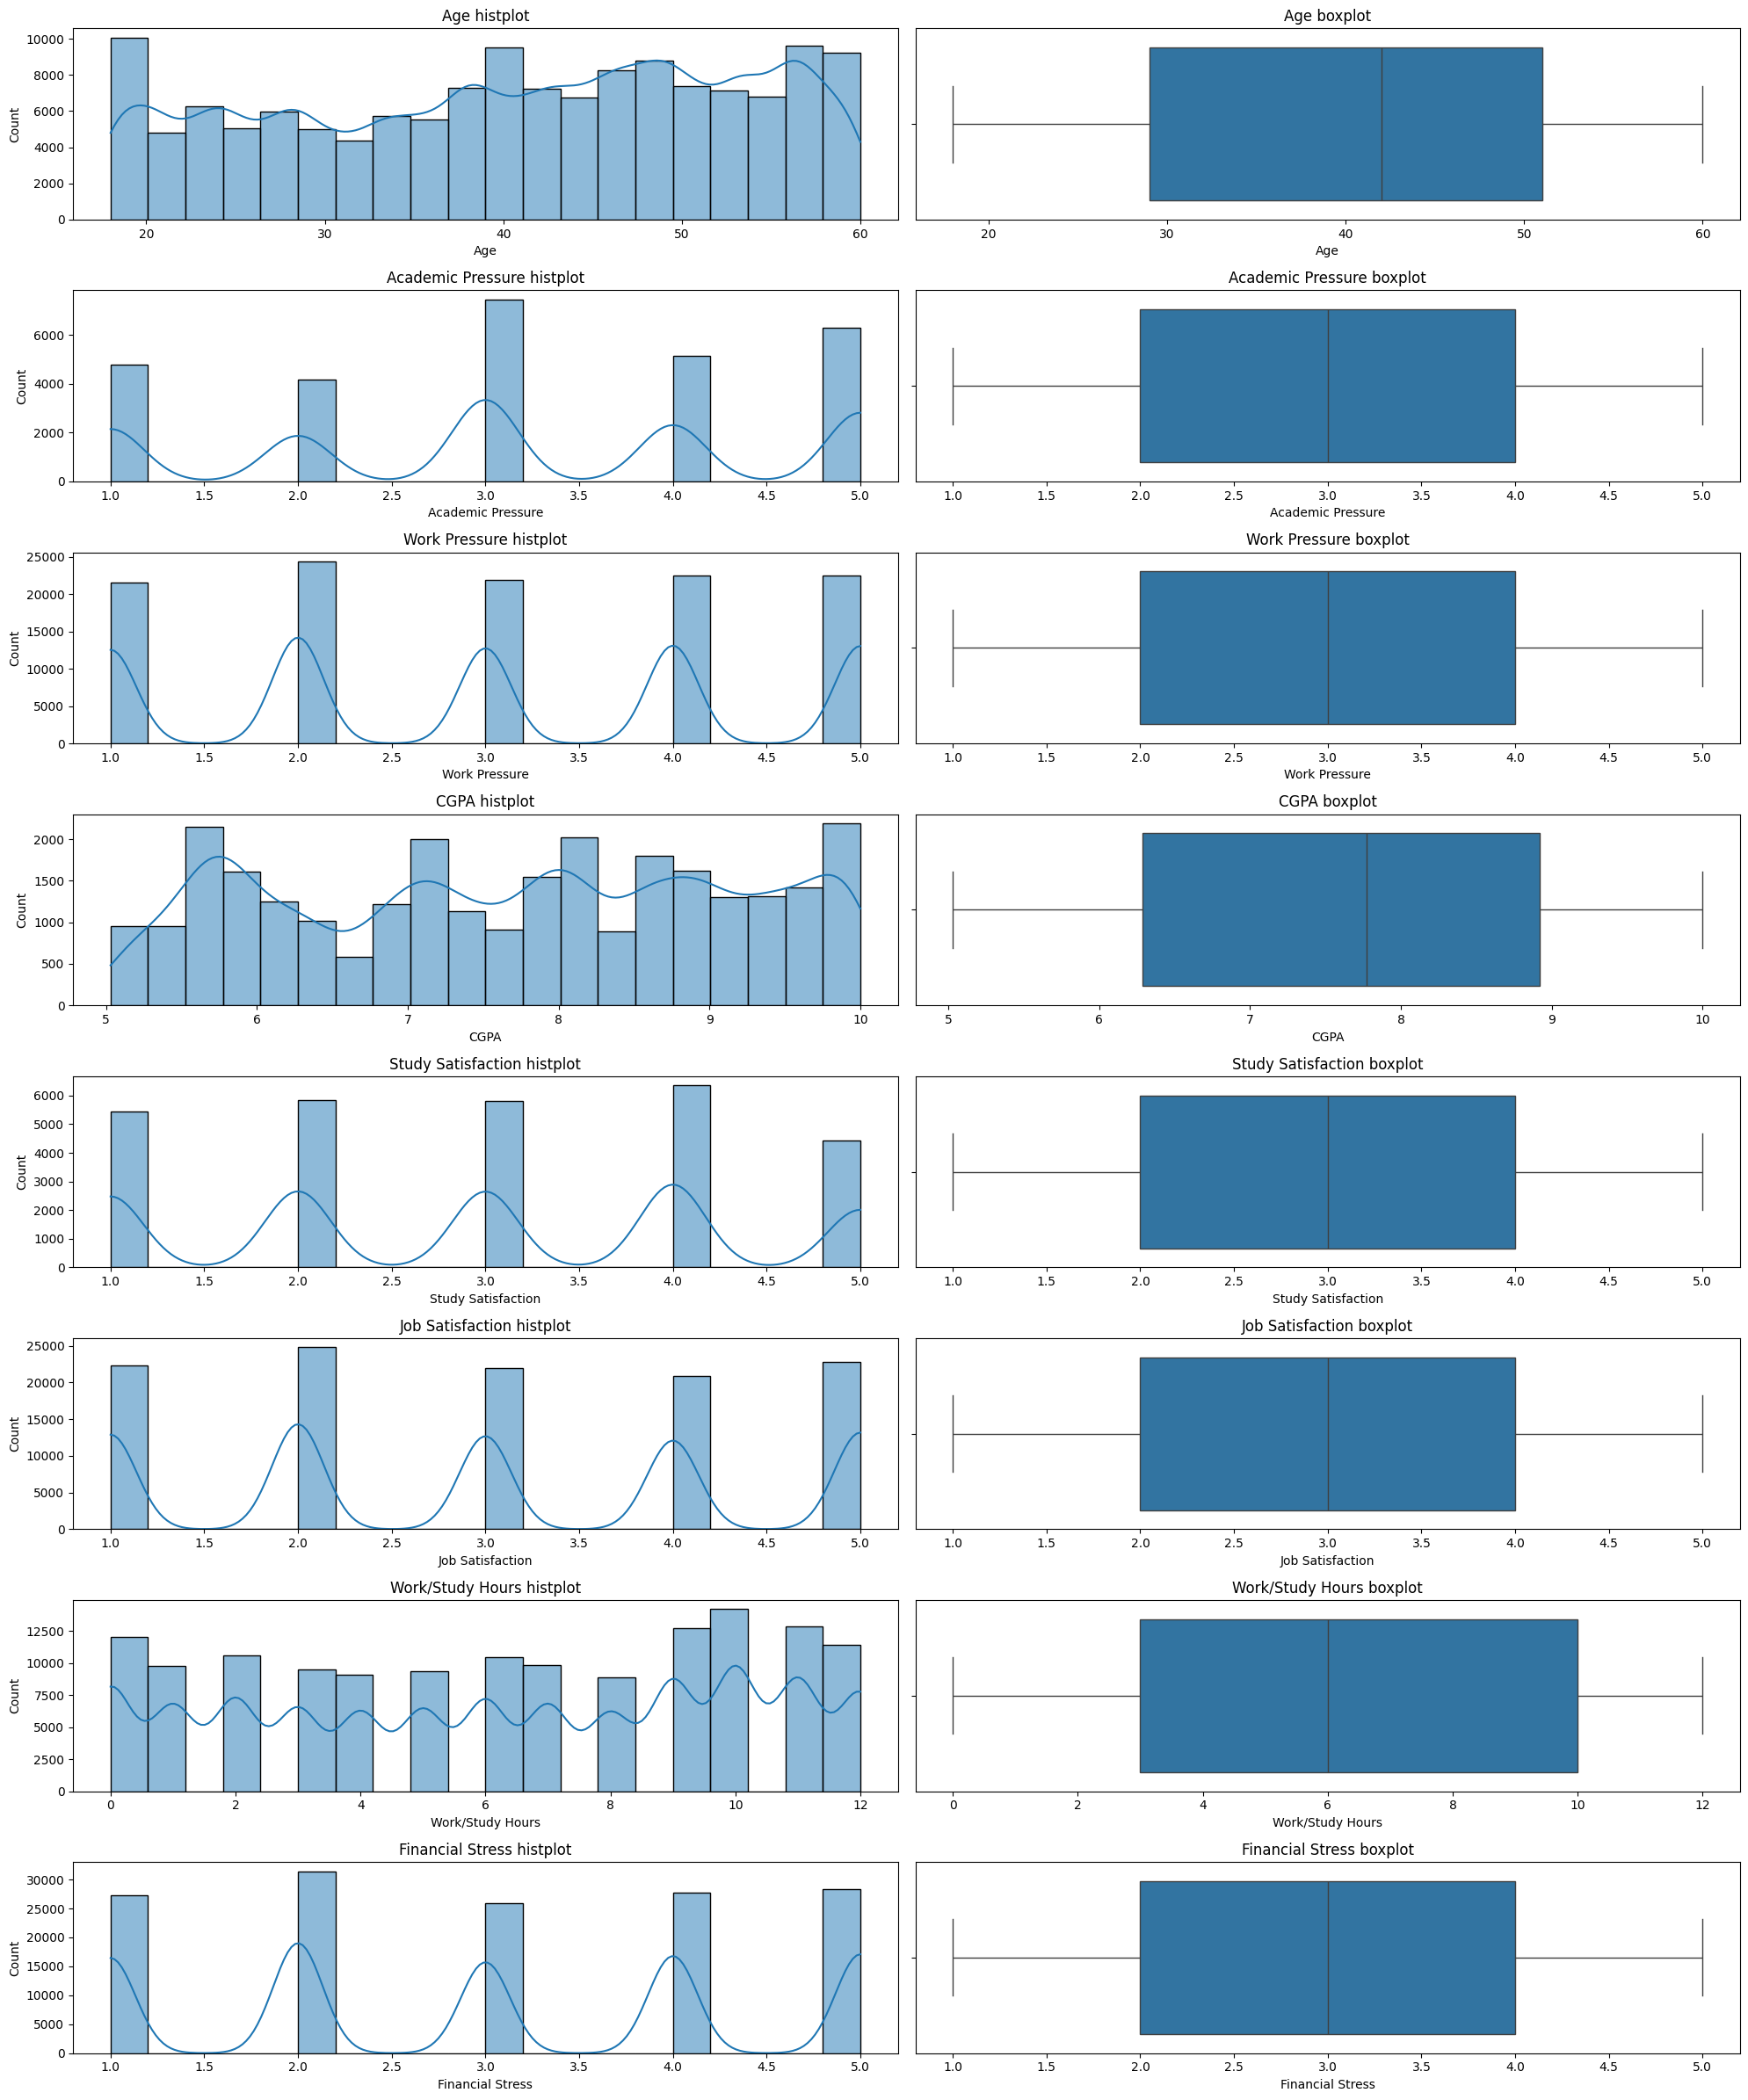

Age Skewness: -0.21797654796653515
Age Kurtosis: -1.1493022003878979
Academic Pressure Skewness: -0.13397650401875497
Academic Pressure Kurtosis: -1.1637385882600573
Work Pressure Skewness: 0.01851506487414507
Work Pressure Kurtosis: -1.2951889880394487
CGPA Skewness: -0.07363649666721835
CGPA Kurtosis: -1.229218975596733
Study Satisfaction Skewness: 0.01176384694368645
Study Satisfaction Kurtosis: -1.2256192708988822
Job Satisfaction Skewness: 0.054361228561354426
Job Satisfaction Kurtosis: -1.3049391628815221
Work/Study Hours Skewness: -0.128168723796842
Work/Study Hours Kurtosis: -1.2834243318818612
Financial Stress Skewness: 0.03560319889721594
Financial Stress Kurtosis: -1.3136619375553866


In [16]:
numerical_analysis(df,num_cols)

# Observations
1. Data is very uniform, with quite normal kurtosis and skew
2. There are no apparent outliers

# Categorical Analysis
1. Find distribution of values and % of value counts

In [17]:
df[cat_cols].nunique()

Name                                     422
Gender                                     2
City                                      98
Working Professional or Student            2
Profession                                64
Sleep Duration                            36
Dietary Habits                            23
Degree                                   115
Have you ever had suicidal thoughts ?      2
Family History of Mental Illness           2
dtype: int64

In [18]:
df['CGPA'].value_counts()

CGPA
8.0400    822
9.9600    425
5.7400    410
8.9500    371
9.2100    343
         ... 
6.6400      1
7.0625      1
6.9800      1
6.4400      1
6.0900      1
Name: count, Length: 331, dtype: int64

In [19]:
cat_col_shortened =[]
for col in cat_cols:
    if df[col].nunique()>20:
        cat_col_shortened.append(col)
print(cat_col_shortened)

['Name', 'City', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree']


In [20]:
def top_value_df(df,cols):
    X = df.copy()
    for col in cols:
        top_values = df[col].value_counts().head(30)
        X[col] = X[col].apply(lambda x: x if x in top_values else "Other")
    return X
        
        
    


In [21]:
df_modified = top_value_df(df,cat_cols)

In [22]:
def cat_analysis(df, cols):
    fig, axs = plt.subplots(len(cols), 1, figsize=(10, 4 * len(cols)))
    
    for i, col in enumerate(cols):  
        axs[i].set_title(f"{col} distribution plot")
        sns.countplot(df, x=col, ax=axs[i])
        
        # Get the count and total number of observations
        total = df[col].shape[0]

        # Annotate with percentage on top of bars
        for p in axs[i].containers[0]:
            height = p.get_height()
            count = int(height)
            if height > 0:  # Avoid dividing by zero
                percentage = f"{height / total * 100:.1f}%"  # Calculate percentage
                annotation = f"{count} \n ({percentage})"
                axs[i].annotate(annotation,  
                                (p.get_x() + p.get_width() / 2, height),  # Position at the top of the bar
                                ha='center', va='bottom', fontsize=6, color='black')
        
        # Rotate x-axis labels for better readability
        axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
    
    plt.tight_layout()
    plt.show()


C:\Users\JEFF\AppData\Local\Temp\ipykernel_7400\1989262687.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
C:\Users\JEFF\AppData\Local\Temp\ipykernel_7400\1989262687.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
C:\Users\JEFF\AppData\Local\Temp\ipykernel_7400\1989262687.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
C:\Users\JEFF\AppData\Local\Temp\ipykernel_7400\1989262687.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].

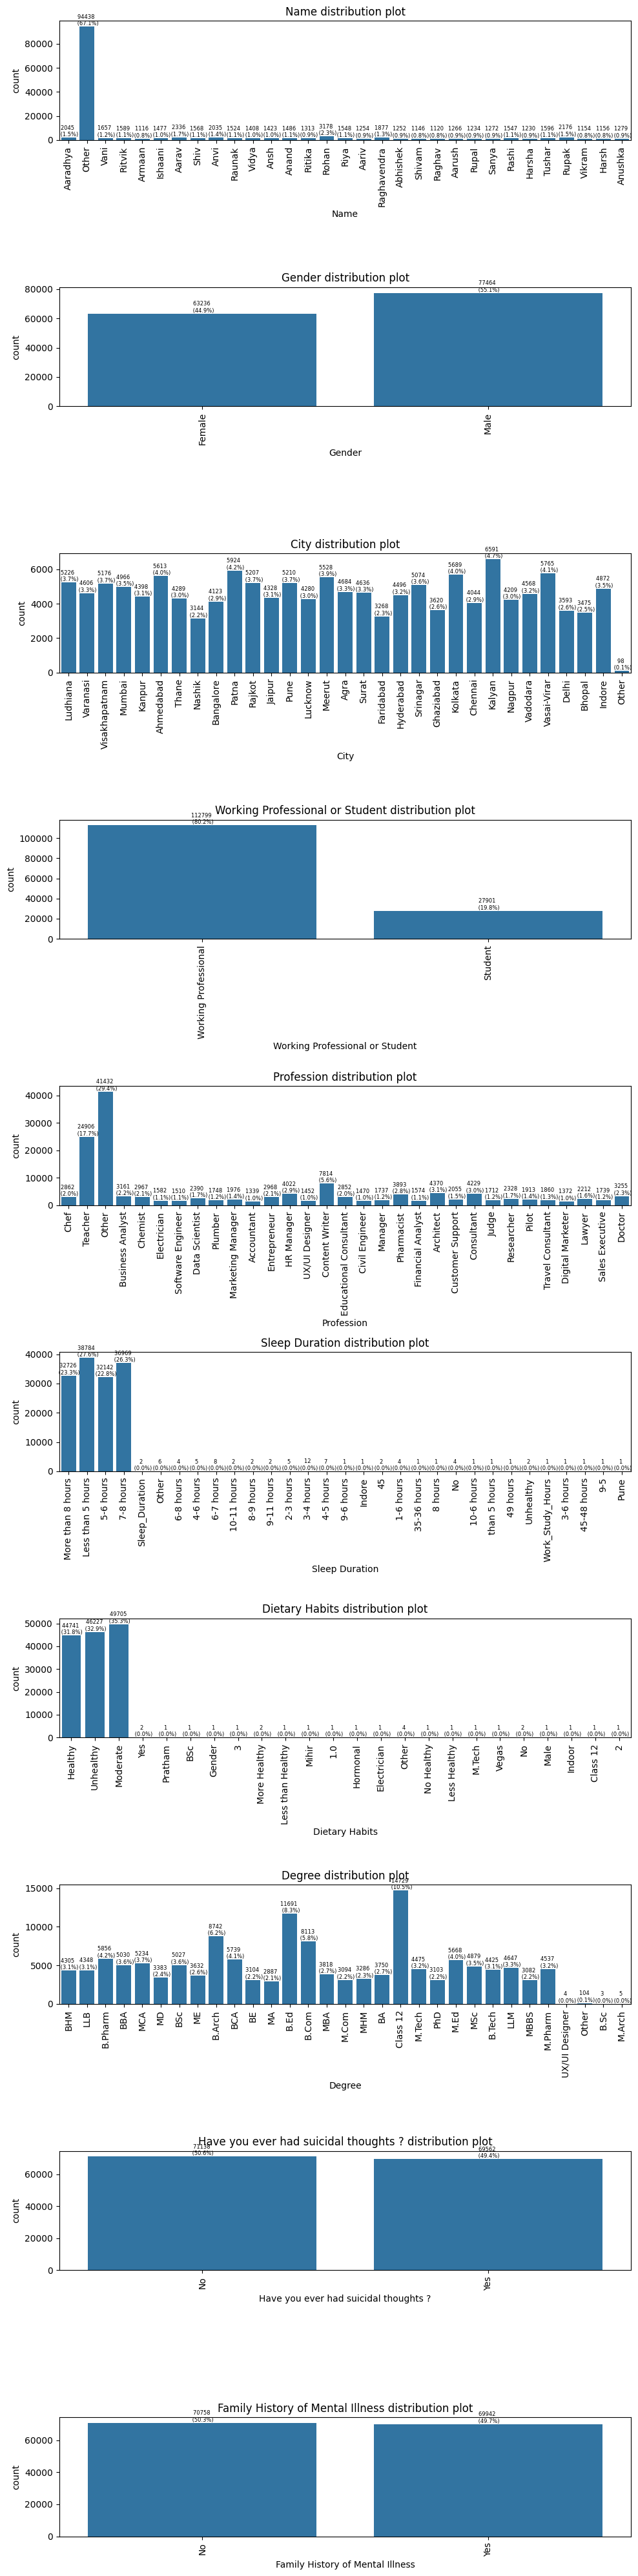

In [23]:
cat_analysis(df_modified,cat_cols)

# Observations
1. Data entry is quite poor
2. There are many names and quite an even distribution between each --> maybe remove the feature altogether?
3. Similarly there are many degrees with an even distribution --> bundle into sectors? relabel rare degrees as "Other"?
4. Dietary habits has poor data entry with 3 dominant categories and the rest appears to be incorrect/misleading data --> Remove data
5. Sleep duration has a similar problem to dietary habits, though values are most likely correct but the categories are so rarely selected. --> Convert to a numerical value?

# Missing Value Analysis

In [24]:
df.isnull().sum()

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

<Axes: >

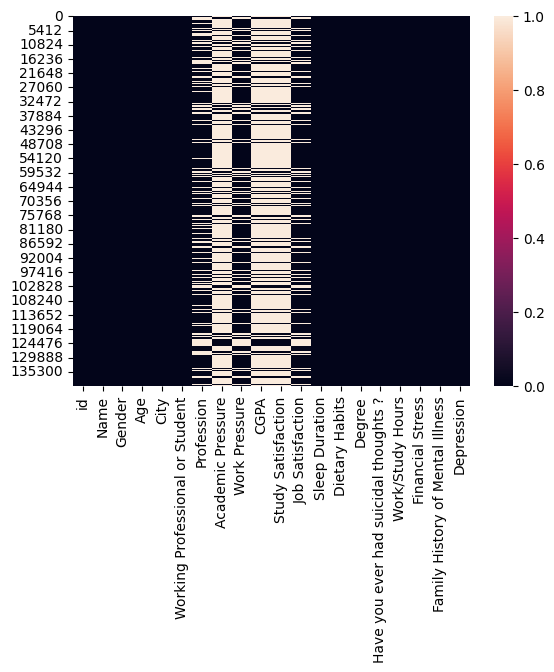

In [25]:
sns.heatmap(df.isnull())

Appears to be entire sections of data missing from the academic pressure, study satisfaction, CGPA categories.
Another set of missing values seems to be present in the working professional or student, work pressure and job satisfaction features. 
The profession feature has additional missing values which don't appear to have any other correlation to other values.

We should see if there is a particular category which may be responsible for missing information

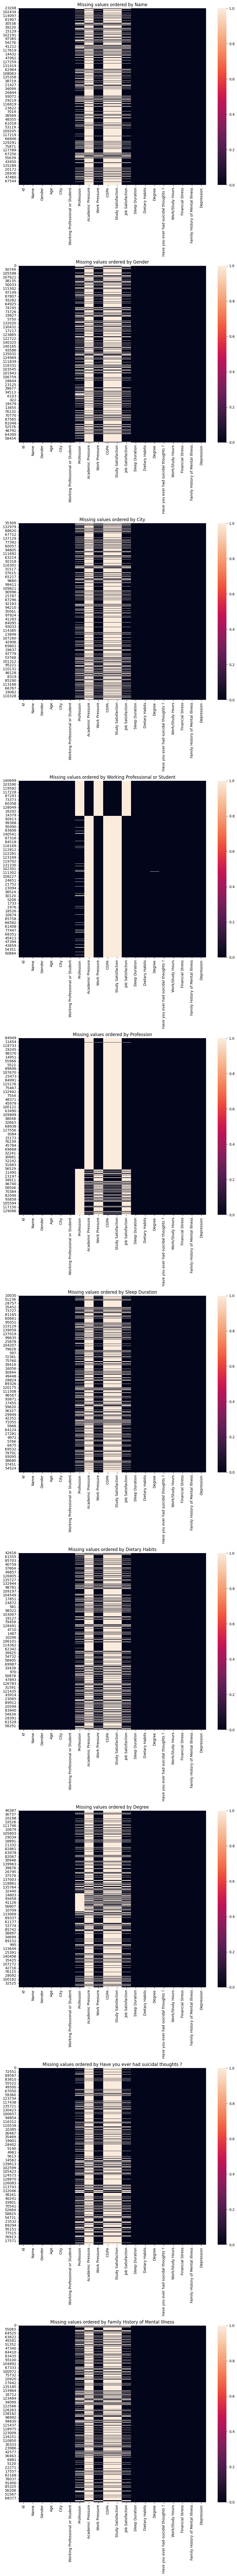

In [26]:
fig,axs = plt.subplots(len(cat_cols),1,figsize=(10,10*len(cat_cols)))
for i,col in enumerate(cat_cols):
    df_col = df.sort_values(by=col)
    axs[i].set_title(f"Missing values ordered by {col}")
    sns.heatmap(df_col.isnull(),ax=axs[i])
plt.tight_layout()
plt.show()
    

There is a clear trend in the working professional/student and the profession categories, that data is missing for other features  also. 

In [27]:
for col in ['Profession','Working Professional or Student']:
    df_col = df.sort_values(by=col)
    missing_counts = df_col.isnull().groupby(df_col[col]).sum()
    display(f"Missing values grouped by {col}:", missing_counts)

'Missing values grouped by Profession:'

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
Profession,,,,,,,,,,,,,,,,,,,,
Academic,0,0,0,0,0,0,0,5,0,5,5,0,0,0,0,0,0,0,0,0
Accountant,0,0,0,0,0,0,0,1339,0,1339,1339,0,0,0,0,0,0,0,0,0
Analyst,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0
Architect,0,0,0,0,0,0,0,4362,8,4362,4362,8,0,0,0,0,0,0,0,0
B.Com,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Unveil,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0
Visakhapatnam,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0
Working Professional,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0


'Missing values grouped by Working Professional or Student:'

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
Working Professional or Student,,,,,,,,,,,,,,,,,,,,
Student,0,0,0,0,0,0,27867,9,27898,9,10,27893,0,2,0,0,0,3,0,0
Working Professional,0,0,0,0,0,0,8763,112794,20,112793,112793,17,0,2,2,0,0,1,0,0


Missing values are most likely true, as working professionals will not have much academic pressure, undergoing CGPA or study. Similarly most students are likely not working, and therefore will not have a profession, work pressure or job satisfaction. As shown above there may be some who are still studying while working, and some who are working while studying. 

There are however a number of rows where working professionals have not selected a specific profession. We should drill down into this

In [28]:
df.head(3)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1


In [29]:
df_h = df[(df['Working Professional or Student'] == 'Working Professional' ) & (df['Profession'].isnull())]

In [30]:
for col in cat_cols:
    display(df_h[col].value_counts())

Name
Anand       285
Aaradhya    190
Abhishek    176
Raunak      168
Rashi       161
           ... 
Anil          1
Anish         1
Aarvi         1
Varun         1
Krey          1
Name: count, Length: 227, dtype: int64

Gender
Male      4874
Female    3889
Name: count, dtype: int64

City
Ahmedabad        515
Vadodara         453
Indore           415
Ludhiana         392
Agra             387
Vasai-Virar      378
Rajkot           378
Thane            376
Kolkata          361
Chennai          351
Pune             304
Kalyan           297
Nagpur           276
Bangalore        272
Varanasi         264
Mumbai           262
Patna            261
Meerut           257
Srinagar         251
Visakhapatnam    249
Hyderabad        247
Kanpur           235
Surat            231
Lucknow          222
Delhi            222
Bhopal           209
Ghaziabad        205
Faridabad        202
Jaipur           164
Nashik           125
Chhavi             1
Saanvi             1
Name: count, dtype: int64

Working Professional or Student
Working Professional    8763
Name: count, dtype: int64

Series([], Name: count, dtype: int64)

Sleep Duration
Less than 5 hours    2909
7-8 hours            2050
More than 8 hours    1901
5-6 hours            1901
3-4 hours               1
49 hours                1
Name: count, dtype: int64

Dietary Habits
Unhealthy       3433
Moderate        2814
Healthy         2515
More Healthy       1
Name: count, dtype: int64

Degree
Class 12    8590
B.Arch        13
B.Ed          11
MD            11
BHM           10
BCA           10
M.Com          8
MBA            8
MCA            8
BE             8
MA             7
LLB            7
BSc            7
B.Com          6
B.Tech         5
B.Pharm        5
MBBS           5
M.Ed           5
M.Pharm        5
MSc            5
ME             4
M.Tech         4
BBA            3
LLM            3
PhD            3
BA             2
MHM            2
LLBA           1
5.56           1
Degree         1
5.88           1
Navya          1
M              1
Name: count, dtype: int64

Have you ever had suicidal thoughts ?
Yes    5042
No     3721
Name: count, dtype: int64

Family History of Mental Illness
No     4472
Yes    4291
Name: count, dtype: int64

In [31]:
df_h[num_cols].describe().reset_index().style.background_gradient()

,index,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress
0,count,8763.000000,4.000000,8745.000000,5.000000,5.000000,8747.000000,8763.000000,8762.000000
1,mean,29.885884,3.250000,3.358834,8.450000,3.000000,2.987767,6.430104,3.130678
2,std,13.751520,0.957427,1.428214,0.713583,1.224745,1.478858,3.807061,1.427684
3,min,18.000000,2.000000,1.000000,8.040000,2.000000,1.000000,0.000000,1.000000
4,25%,18.000000,2.750000,2.000000,8.110000,2.000000,2.000000,3.000000,2.000000
5,50%,20.000000,3.500000,4.000000,8.140000,3.000000,3.000000,7.000000,3.000000
6,75%,42.000000,4.000000,5.000000,8.240000,3.000000,4.000000,10.000000,4.000000
7,max,60.000000,4.000000,5.000000,9.720000,5.000000,5.000000,12.000000,5.000000


In [32]:
df_h['Degree'].value_counts().head(5)

Degree
Class 12    8590
B.Arch        13
B.Ed          11
MD            11
BHM           10
Name: count, dtype: int64

Vast majority of people who are Working professionals but don't currently have a profession have "Class 12" as a degree. They also have work related features. For whatever reason, they may not have wanted to put down their profession, or their profession is hard to describe.

# Observations
1. In 99%+ cases Working professionals did not fill out academia related information such as Study Satisfaction/CGPA/Academic Pressure --> **As this is not MCAR, we can assume that the null values are genuine**

2. Similarly in 99%+ cases, Students did not fill out work related information such as Profession/Job Satisfaction/Work Pressure --> **As this is not MCAR, we can assume that the null values are genuine**

3. Furthermore, there are Working professionals who also appear to be working, but did not put down a profession --> **Impute unknown as it does not seem to be MCAR due to the vast majority of these having a maximum education of "Class 12"**

4. After the above imputations, all other missing values can be imputed for mean or mode depending on num or cat

# Preprocessing 
1. Check to see if the row is for a WP or student
2. If for Working Professional, then Study Satisfaction, CGPA, Academic Pressure can be left empty if they are empty, all other values should be imputed (mean and most common)
3. If for Student, the Profession, Job Satisfaction, Work Pressure can be left empty if they are empty, all other values should be imputed (mean and most common)
4. Those who are Working Professionals but did not assign a profession, should impute "Unknown"

In [33]:
df.isnull().sum()

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

In [34]:
df.dtypes

id                                         int64
Name                                      object
Gender                                    object
Age                                      float64
City                                      object
Working Professional or Student           object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness          object
Depression                                 int64
dtype: object

In [35]:
def preprocessing(df):
    X = df.copy()
    X.drop(columns=['id','Name'],inplace=True)
    
    # Impute unknown onto professionals who did not put down a profession
    X.loc[(X['Working Professional or Student'] == "Working Professional") & (X['Profession'].isnull()), 'Profession'] = "Unknown"
    # Remaining missing values are 99% either students or professionals who have not filled out the respective data fields. We can just leave these
    
    # Find degree values which aren't statistically important (<100) and change to "Other"
    degree_counts = X['Degree'].value_counts()
    rare_degrees = degree_counts[degree_counts<100].index
    X.loc[X['Degree'].isin(rare_degrees),"Degree"] = "Other"

    # Impute the most common for missing values
    X['Degree'] = X['Degree'].fillna(X['Degree'].mode()[0])

    # Map sleeping habits
    mapping_sleeping = {
        "Less than 5 hours": 4.5,
        "5-6 hours" : 5.5,
        "7-8 hours" : 7.5,
        "More than 8 hours" : 8.5 
    }
    X['Sleep Duration'] = X['Sleep Duration'].map(mapping_sleeping)
    X['Sleep Duration'] = X['Sleep Duration'].fillna(value=X['Sleep Duration'].median())

    # Find diet habits which aren't important (<100) and change to "Other"
    diet_counts = X['Dietary Habits'].value_counts()
    rare_diets = diet_counts[diet_counts<100].index
    X.loc[X['Dietary Habits'].isin(rare_diets),"Dietary Habits"] = "Other"
    X['Dietary Habits'] = X['Dietary Habits'].fillna(X['Dietary Habits'].mode()[0])

    # Impute Financial stress as the median
    X['Financial Stress'] = X['Financial Stress'].fillna(X['Financial Stress'].median())
    return X

            

        

In [36]:
df_test1 = preprocessing(df)


In [37]:
df_test1.isnull().sum()

Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                27867
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                0
Degree                                        0
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              0
Family History of Mental Illness              0
Depression                                    0
dtype: int64

In [38]:
df_test1.dtypes

Gender                                    object
Age                                      float64
City                                      object
Working Professional or Student           object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                           float64
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness          object
Depression                                 int64
dtype: object

In [39]:
df_test1.nunique()

Gender                                     2
Age                                       43
City                                      98
Working Professional or Student            2
Profession                                65
Academic Pressure                          5
Work Pressure                              5
CGPA                                     331
Study Satisfaction                         5
Job Satisfaction                           5
Sleep Duration                             4
Dietary Habits                             4
Degree                                    28
Have you ever had suicidal thoughts ?      2
Work/Study Hours                          13
Financial Stress                           5
Family History of Mental Illness           2
Depression                                 2
dtype: int64

# Correlation Analysis
1. It is a good idea to see how specific features can affect mental health
2. We do not need to analyze id and name 

In [40]:
df_c = preprocessing(df)

In [41]:
df_c.columns

Index(['Gender', 'Age', 'City', 'Working Professional or Student',
       'Profession', 'Academic Pressure', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration',
       'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?',
       'Work/Study Hours', 'Financial Stress',
       'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [42]:
df_c.dtypes

Gender                                    object
Age                                      float64
City                                      object
Working Professional or Student           object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                           float64
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness          object
Depression                                 int64
dtype: object

In [43]:
num_col_c = df_c.select_dtypes(include=("float64","int64")).columns
cat_col_c = df_c.select_dtypes(include=("object")).columns

<Axes: >

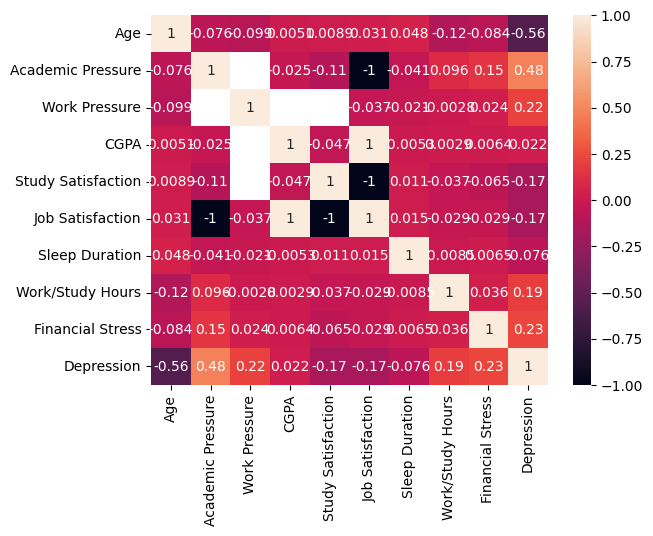

In [44]:
sns.heatmap(df_c[num_col_c].corr(),annot=True)

# Observations
1. Each feature seams to have some form of correlation with Depression and therefore should be considered
2. Academic Pressure, Work pressure, Work/Study Hours and Financial stress have a positive correlation to depression
3. Age has a strong negative correlation to depression
4. As Study satisfaction, Job satisfaction have a lesser negative correlation to depression


# Age Correlation to depression

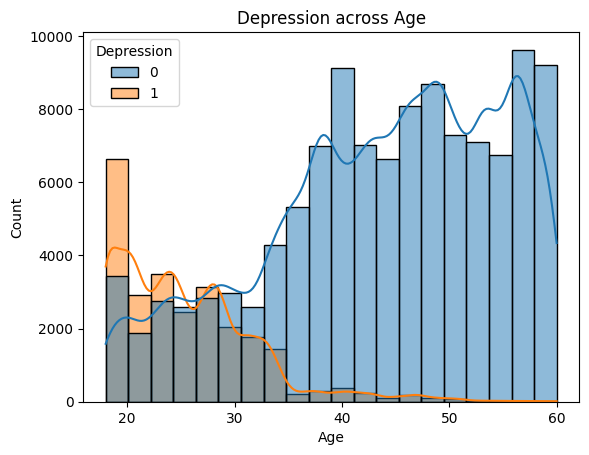

In [45]:
plt.Figure(figsize=(10,10))
plt.title("Depression across Age")
sns.histplot(data=df_c,x='Age',hue='Depression',kde=True,bins=20)
plt.show()

# Pressure, and Financial Stress factors in relation to depression

In [46]:
cols = ['Academic Pressure','Work Pressure','Financial Stress']

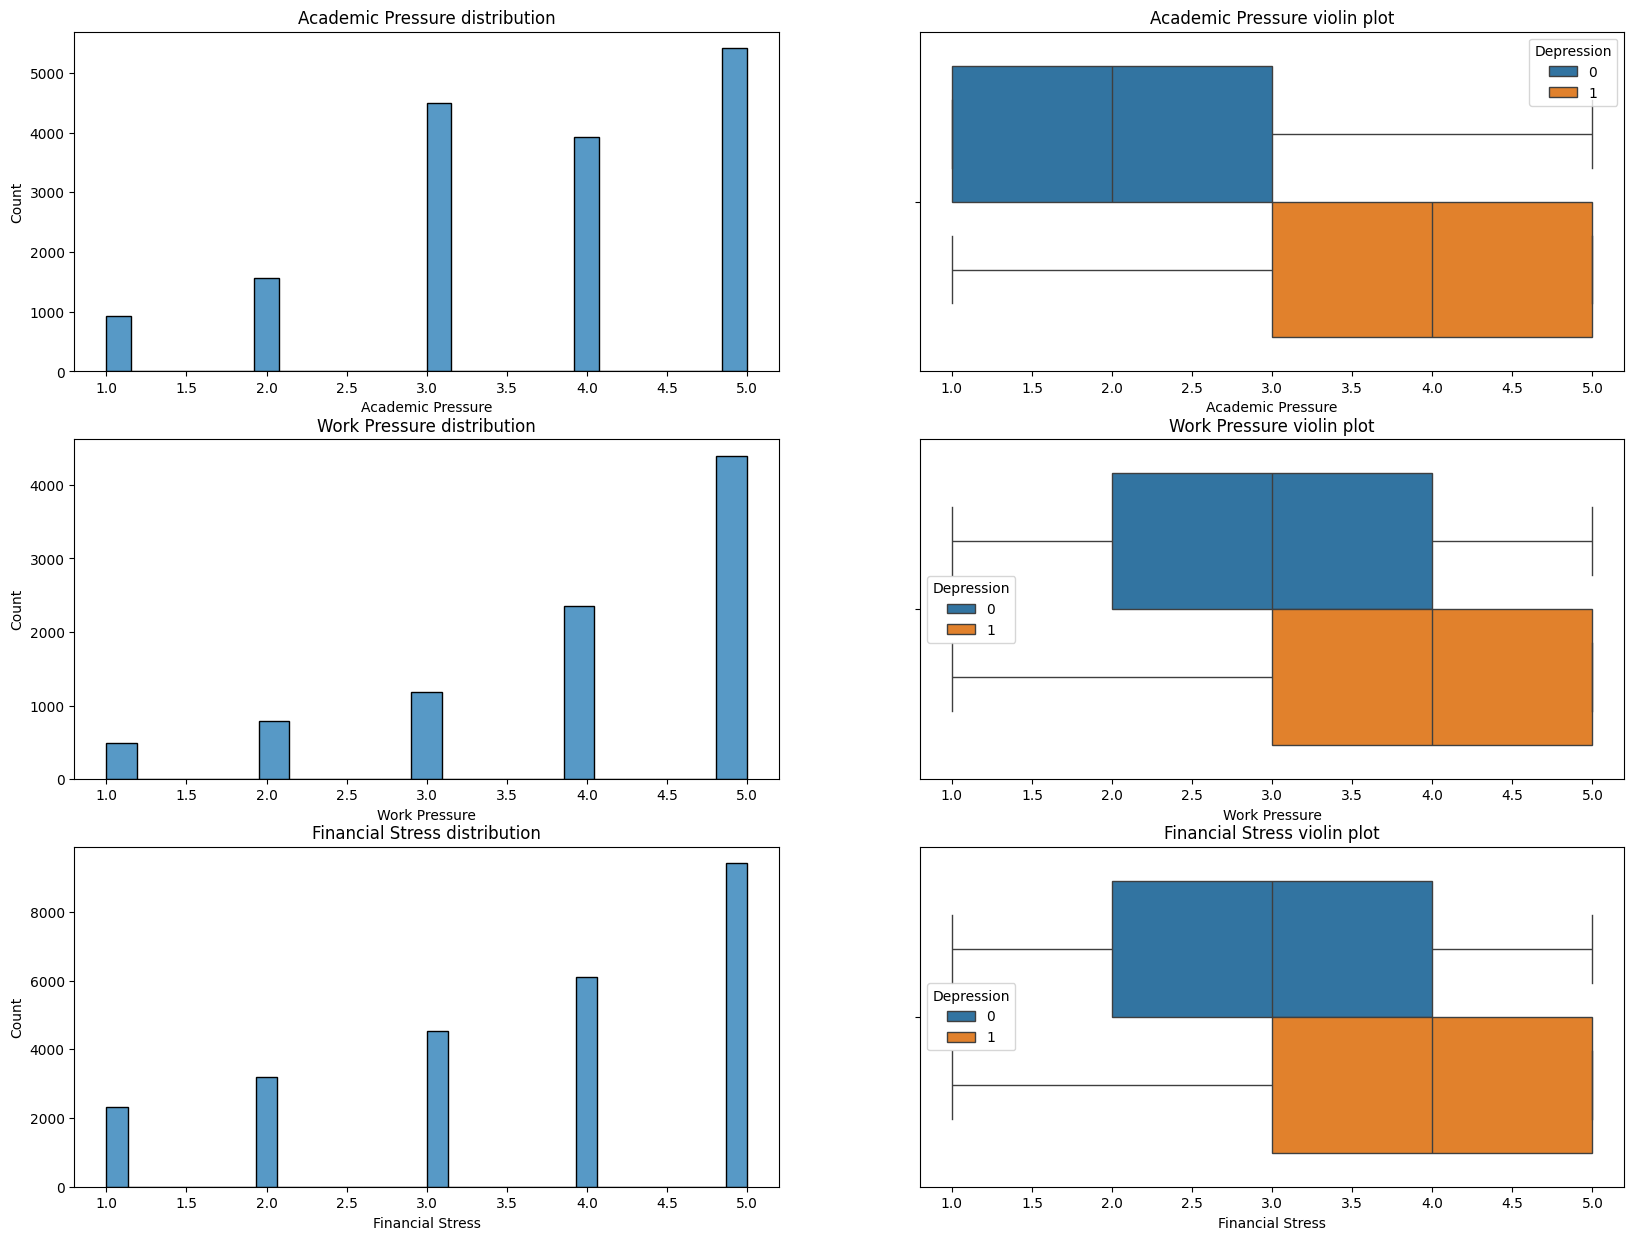

<Figure size 640x480 with 0 Axes>

In [47]:
fig,axs = plt.subplots(len(cols),2,figsize=(20,5*len(cols)))

for i,col in enumerate(cols):
    axs[i,0].set_title(f"{col} distribution")
    sns.histplot(data=df[df['Depression']==1],x=col,ax=axs[i,0])
    axs[i,1].set_title(f"{col} violin plot")
    sns.boxplot(data=df,x=col,hue='Depression',ax=axs[i,1])

plt.show()
plt.tight_layout()

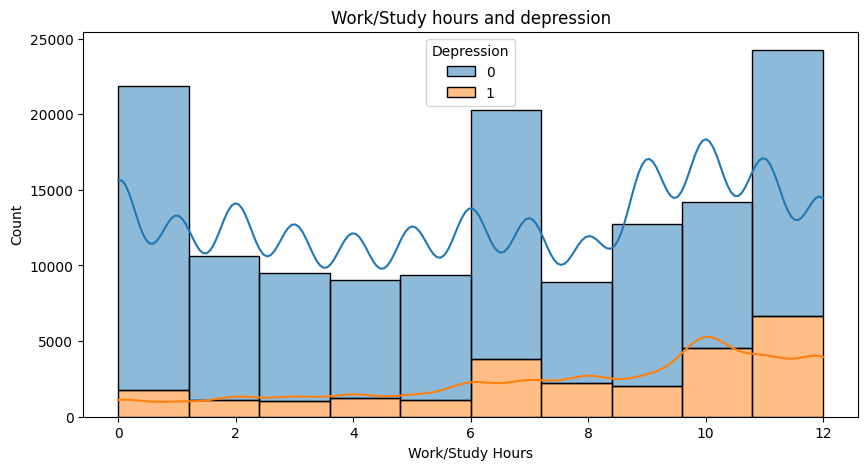

In [48]:
plt.figure(figsize=(10,5))
plt.title("Work/Study hours and depression")
sns.histplot(data=df,x='Work/Study Hours',hue='Depression',kde=True, bins=10, multiple="stack")
plt.show()

<Axes: title={'center': 'Job Satisfaction vs Rate of Depression'}, xlabel='Job Satisfaction', ylabel='Count'>

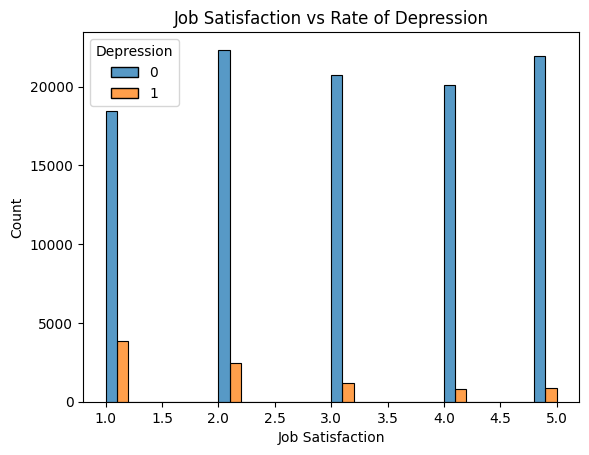

In [49]:
plt.Figure(figsize=(8,8))
plt.title("Job Satisfaction vs Rate of Depression")
sns.histplot(data=df,x='Job Satisfaction',bins=20,hue='Depression',multiple="dodge")

<Axes: title={'center': 'Work Satisfaction vs Rate of depression'}, xlabel='Job Satisfaction', ylabel='Count'>

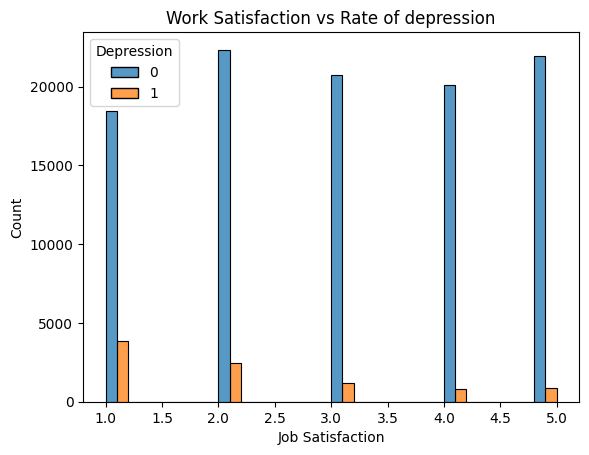

In [50]:
plt.Figure(figsize=(8,8))
plt.title("Work Satisfaction vs Rate of depression")
sns.histplot(data=df,x='Job Satisfaction',bins=20,hue='Depression',multiple='dodge')

In [51]:
cat_col_c

Index(['Gender', 'City', 'Working Professional or Student', 'Profession',
       'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?',
       'Family History of Mental Illness'],
      dtype='object')

# Categorical Correlations
- See if there is a correlation between categorical values and depression

In [52]:
# By Gender
df.groupby('Gender')['Depression'].value_counts(normalize=True).reset_index()


,Gender,Depression,proportion
0,Female,0,0.821763
1,Female,1,0.178237
2,Male,0,0.815450
3,Male,1,0.184550


***women are more likely to have depression than men, by 1%***

In [53]:
# By City
popular_cities = df['City'].value_counts().head(10).index
df[df['City'].isin(popular_cities)].groupby(by='City')['Depression'].mean().sort_values(ascending=False).reset_index()


,City,Depression
0,Ahmedabad,0.217887
1,Kalyan,0.199666
2,Vasai-Virar,0.197918
3,Ludhiana,0.192690
4,Kolkata,0.173668
5,Rajkot,0.173228
6,Patna,0.163234
7,Pune,0.161036
8,Visakhapatnam,0.159196
9,Meerut,0.134045


In [54]:
# By Working Professionals or Students
df.groupby('Working Professional or Student')['Depression'].value_counts(normalize=True).reset_index()

,Working Professional or Student,Depression,proportion
0,Student,1,0.585499
1,Student,0,0.414501
2,Working Professional,0,0.918164
3,Working Professional,1,0.081836


In [55]:
# By profession
most_common_professions = df['Profession'].value_counts().head(10).index

depression_rate_prof = df[df['Profession'].isin(most_common_professions)].groupby(by='Profession')['Depression'].value_counts(normalize=True).reset_index()

depression_rate_prof[depression_rate_prof['Depression'] == 1].sort_values('proportion',ascending=False)

,Profession,Depression,proportion
15,HR Manager,1,0.106912
1,Architect,1,0.099085
3,Business Analyst,1,0.056628
19,Teacher,1,0.055649
11,Doctor,1,0.052842
7,Consultant,1,0.047056
5,Chemist,1,0.028311
17,Pharmacist,1,0.026715
13,Entrepreneur,1,0.020889
9,Content Writer,1,0.018684


<Axes: xlabel='Dietary Habits', ylabel='count'>

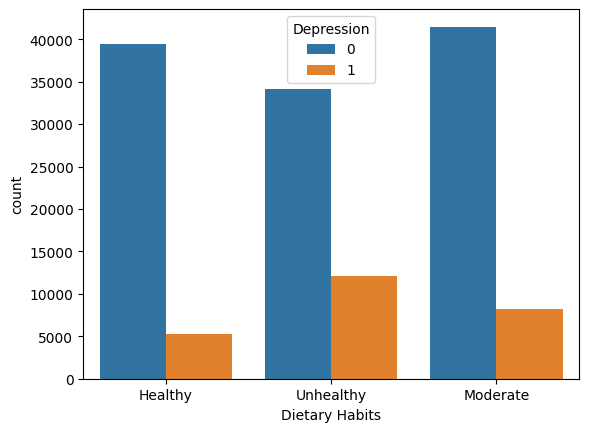

In [56]:
# By dietary habits
common_dietary_habits = df['Dietary Habits'].value_counts().head(3).index
df[df['Dietary Habits'].isin(common_dietary_habits)].groupby('Dietary Habits')['Depression'].mean().reset_index()
sns.countplot(data=df[df['Dietary Habits'].isin(common_dietary_habits)],x='Dietary Habits',hue='Depression')


In [57]:
df_diet = df[df['Dietary Habits'].isin(common_dietary_habits)].groupby('Dietary Habits')['Depression'].count().reset_index(name='count')
df_diet['prop'] = df_diet['count'] / df_diet['count'].sum()
display(df_diet)

,Dietary Habits,count,prop
0,Healthy,44741,0.318050
1,Moderate,49705,0.353337
2,Unhealthy,46227,0.328613


# Create Pipelines to train two models
- Use CatBoost 
- Use XGBClassifier

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
import xgboost as xgb
from catboost import CatBoostClassifier
# Tuning with randomsearch
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from scipy.stats import uniform, randint

In [59]:
X = df.drop(columns='Depression')
y = df['Depression']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, random_state=43)

Create pipeline with scalers on numerical features, and one-hot encoding on categorical features

In [60]:
model_xgb = xgb.XGBClassifier()
model_cat = CatBoostClassifier()

In [61]:

num_cols_p = num_cols
cat_cols_p = cat_cols.drop('Name')

In [63]:
X_train.columns

Index(['id', 'Name', 'Gender', 'Age', 'City',
       'Working Professional or Student', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness'],
      dtype='object')

In [80]:
def pipeline_stack(model):

    
    num_pipeline = Pipeline(steps = [
        ('scaler',StandardScaler())
    ])

    cat_pipeline = Pipeline(steps = [
        ('impute',SimpleImputer(strategy='constant',fill_value='missing')),
        ('onehot',OneHotEncoder(handle_unknown='ignore'))
    ])

    col_transform = ColumnTransformer(transformers = [
        ('num_pipeline',num_pipeline,num_cols_p),
        ('cat_pipeline',cat_pipeline,cat_cols_p)
        ],
        remainder='passthrough'
    )

    pipeline_final = Pipeline(steps = [
        ('Preprocessing', FunctionTransformer(preprocessing)),
        ('col_transformer',col_transform),
        ('model',model)
    ])

    return pipeline_final

In [81]:
xgb_pipeline = pipeline_stack(model_xgb)
catboost_pipeline = pipeline_stack(model_cat)

In [82]:
def pipeline_fit_and_evaluate(X_train,y_train,X_test,y_test,pipeline):
    pipeline.fit(X_train,y_train)
    y_preds = pipeline.predict(X_test)
    accuracy = accuracy_score(y_preds,y_test)
    return accuracy

In [84]:
pipeline_fit_and_evaluate(X_train,y_train,X_test,y_test,xgb_pipeline)

0.9382196162046909

In [85]:
pipeline_fit_and_evaluate(X_train,y_train,X_test,y_test,model_cat)

CatBoostError: Bad value for num_feature[non_default_doc_idx=0,feature_idx=1]="Nalini": Cannot convert 'b'Nalini'' to float